
# Oral Insulin Phase II Clinical Trial    

# Table of contents


[1. Our dataset: Auralin and Novodra Trials](#Dataset)

[2. Gathering Data](#gathering)

[3. Assessing Data](#assessing)
  * [A. Visual Assessment](#visual)

  * [B. Programmatic Assessment](#programmatic)

[4. Cleaning Data](#cleaning)
  * [A. Creating Dataframe Copies](#copies)
  
  * [B. Cleaning Missing Data](#missing)

  * [C. Cleaning Tidiness Issues](#tidiness)
  
  * [D. Cleaning Quality Issues](#quality)

<a id='Dataset'></a>

## Our dataset: Auralin and Novodra Trials

We will be looking at the phase two clinical trial data of 350 patients for a new innovative oral insulin called Auralin - a proprietary capsule that can solve this stomach lining problem.

**Phase two trials are intended to:**

- Test the efficacy and the dose response of a drug
- Identify adverse reactions

In this trial, half of the patients are being treated with Auralin, and the other 175 being treated with a popular injectable insulin called Novodra. By comparing key metrics between these two drugs, we can determine if Auralin is effective.

<a id='gathering'></a>

## Gathering Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
patients = pd.read_csv('patients.csv')
treatments = pd.read_csv('treatments.csv')
adverse_reactions = pd.read_csv('adverse_reactions.csv')

<a id='assessing'></a>

## Assessing Data 

<a id='visual'></a>

## A) Visual Assessment: Acquaint Yourself

This Auralin Phase II clinical trial dataset comes in three tables: `patients`, `treatments`, and `adverse_reactions`. Acquaint yourself with them through visual assessment below.

In the cells below, each column of each table in this clinical trial dataset is described. To see the table that goes hand in hand with these descriptions, display each table in its entirety by displaying the pandas DataFrame that it was gathered into. This task is the mechanical part of visual assessment in pandas.

In [3]:
# Display the patients table
patients

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7


`patients` columns:
- **patient_id**: the unique identifier for each patient in the [Master Patient Index](https://en.wikipedia.org/wiki/Enterprise_master_patient_index) (i.e. patient database) of the pharmaceutical company that is producing Auralin
- **assigned_sex**: the assigned sex of each patient at birth (male or female)
- **given_name**: the given name (i.e. first name) of each patient
- **surname**: the surname (i.e. last name) of each patient
- **address**: the main address for each patient
- **city**: the corresponding city for the main address of each patient
- **state**: the corresponding state for the main address of each patient
- **zip_code**: the corresponding zip code for the main address of each patient
- **country**: the corresponding country for the main address of each patient (all United states for this clinical trial)
- **contact**: phone number and email information for each patient
- **birthdate**: the date of birth of each patient (month/day/year). The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is  age >= 18 *(there is no maximum age because diabetes is a [growing problem](http://www.diabetes.co.uk/diabetes-and-the-elderly.html) among the elderly population)*
- **weight**: the weight of each patient in pounds (lbs)
- **height**: the height of each patient in inches (in)
- **bmi**: the Body Mass Index (BMI) of each patient. BMI is a simple calculation using a person's height and weight. The formula is BMI = kg/m<sup>2</sup> where kg is a person's weight in kilograms and m<sup>2</sup> is their height in metres squared. A BMI of 25.0 or more is overweight, while the healthy range is 18.5 to 24.9. *The [inclusion criteria](https://en.wikipedia.org/wiki/Inclusion_and_exclusion_criteria) for this clinical trial is 16 <= BMI <= 38.*

In [4]:
# Display the treatments table
treatments

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32
...,...,...,...,...,...,...,...
275,albina,zetticci,45u - 51u,-,7.93,7.73,0.20
276,john,teichelmann,-,49u - 49u,7.90,7.58,NaN
277,mathea,lillebø,23u - 36u,-,9.04,8.67,0.37
278,vallie,prince,31u - 38u,-,7.64,7.28,0.36


350 patients participated in this clinical trial. None of the patients were using Novodra (a popular injectable insulin) or Auralin (the oral insulin being researched) as their primary source of insulin before.  All were experiencing elevated HbA1c levels.

All 350 patients were treated with Novodra to establish a baseline HbA1c level and insulin dose. After four weeks, which isn’t enough time to capture all the change in HbA1c that can be attributed by the switch to Auralin or Novodra:
- 175 patients switched to Auralin for 24 weeks
- 175 patients continued using Novodra for 24 weeks

`treatments` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial
- **auralin**: the baseline median daily dose of insulin from the week prior to switching to Auralin (the number before the dash) *and* the ending median daily dose of insulin at the end of the 24 weeks of treatment measured over the 24th week of treatment (the number after the dash). Both are measured in units (shortform 'u'), which is the [international unit](https://en.wikipedia.org/wiki/International_unit) of measurement and the standard measurement for insulin.
- **novodra**: same as above, except for patients that continued treatment with Novodra
- **hba1c_start**: the patient's HbA1c level at the beginning of the first week of treatment. HbA1c stands for Hemoglobin A1c. The [HbA1c test](https://depts.washington.edu/uwcoe/healthtopics/diabetes.html) measures what the average blood sugar has been over the past three months. It is thus a powerful way to get an overall sense of how well diabetes has been controlled. Everyone with diabetes should have this test 2 to 4 times per year. Measured in %.
- **hba1c_end**: the patient's HbA1c level at the end of the last week of treatment
- **hba1c_change**: the change in the patient's HbA1c level from the start of treatment to the end, i.e., `hba1c_start` - `hba1c_end`. For Auralin to be deemed effective, it must be "noninferior" to Novodra, the current standard for insulin. This "noninferiority" is statistically defined as the upper bound of the 95% confidence interval being less than 0.4% for the difference between the mean HbA1c changes for Novodra and Auralin (i.e. Novodra minus Auralin).

In [5]:
# Display the adverse_reactions table
adverse_reactions

,given_name,surname,adverse_reaction
0,berta,napolitani,injection site discomfort
1,lena,baer,hypoglycemia
2,joseph,day,hypoglycemia
3,flavia,fiorentino,cough
4,manouck,wubbels,throat irritation
5,jasmine,sykes,hypoglycemia
6,louise,johnson,hypoglycemia
7,albinca,komavec,hypoglycemia
8,noe,aranda,hypoglycemia
9,sofia,hermansen,injection site discomfort


`adverse_reactions` columns:
- **given_name**: the given name of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **surname**: the surname of each patient in the Master Patient Index that took part in the clinical trial and had an adverse reaction (includes both patients treated Auralin and Novodra)
- **adverse_reaction**: the adverse reaction reported by the patient

Additional useful information:
- [Insulin resistance varies person to person](http://www.tudiabetes.org/forum/t/how-much-insulin-is-too-much-on-a-daily-basis/9804/5), which is why both starting median daily dose and ending median daily dose are required, i.e., to calculate change in dose.
- It is important to test drugs and medical products in the people they are meant to help. People of different age, race, sex, and ethnic group must be included in clinical trials. This [diversity](https://www.clinicalleader.com/doc/an-fda-perspective-on-patient-diversity-in-clinical-trials-0001) is reflected in the `patients` table.
- Ensuring column names are descriptive enough is an important step in acquainting yourself with the data. 'Descriptive enough' is subjective. Ideally you want short column names (so they are easier to type and read in code form) but also fully descriptive. Length vs. descriptiveness is a tradeoff and common debate (a [similar debate](https://softwareengineering.stackexchange.com/questions/176582/is-there-an-excuse-for-short-variable-names) exists for variable names). The *auralin* and *novodra* column names are probably not descriptive enough, but you'll address that later so don't worry about that for now.

### Quality
#### `patients` table
- zip code is a float not a string
- zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- full state names sometimes, abbreviations other times
- Dsvid Gustafsson

#### `treatments` table
- missing HbA1c changes
- the letter u in starting and ending doses for Auralin and Novodra
- lowercase given names and surnames
- missing records (280 instead of 350)

#### `adverse_reactions` table
- lowercase given names and surnames

### Data Quality Dimensions

- Missing records in the treatments table, 280 instead of 350. This is pretty straightforward, this is a **completeness** issue. We don't have all the records that we need.
- The letter U in the dosage information for Auralin and Novodra is a **validity** issue. 23u is not a valid dose. The valid dose is 23, and the unit of measurement is u, which stands for insulin units.
- The typo in David (Dsvidinstead of David) is an **accuracy** issue. There's nothing illegal about having the name Dsvid, so it's not invalid, it's just inaccurate.
- The lowercase given names and surnames in the treatments and adverse_reactions tables is a **consistency** issue. It's not necessarily a big deal that the given names and surnames are lowercase, it's just that in the patients table the names are capitalized so we'd run into issues when joining these tables based on name.


<a id='programmatic'></a>

## B) Programmatic Assessment
These are the programmatic assessment methods in pandas that you will probably use most often:

* `.head()` (DataFrame and Series)
* `.tail()` (DataFrame and Series)
* `.sample()` (DataFrame and Series)
* `.info()` (DataFrame only)
* `.describe()` (DataFrame and Series)
* `.value_counts()` (Series only)
* Various methods of indexing and selecting data (.loc and bracket notation with/without boolean indexing, also .iloc)

Try them out below and keep their results in mind. Some will come in handy later in the lesson.

Check out the [pandas API reference](https://pandas.pydata.org/pandas-docs/stable/api.html) for detailed usage information.

#### Try `.head` and `.tail` on the `patients` table.

In [6]:
patients.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1


In [7]:
patients.tail()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
498,499,male,Mustafa,Lindström,2530 Victoria Court,Milton Mills,ME,3852.0,United States,207-477-0579MustafaLindstrom@jourrapide.com,4/10/1959,181.1,72,24.6
499,500,male,Ruman,Bisliev,494 Clarksburg Park Road,Sedona,AZ,86341.0,United States,928-284-4492RumanBisliev@gustr.com,3/26/1948,239.6,70,34.4
500,501,female,Jinke,de Keizer,649 Nutter Street,Overland Park,MO,64110.0,United States,816-223-6007JinkedeKeizer@teleworm.us,1/13/1971,171.2,67,26.8
501,502,female,Chidalu,Onyekaozulu,3652 Boone Crockett Lane,Seattle,WA,98109.0,United States,ChidaluOnyekaozulu@jourrapide.com1 360 443 2060,2/13/1952,176.9,67,27.7
502,503,male,Pat,Gersten,2778 North Avenue,Burr,Nebraska,68324.0,United States,PatrickGersten@rhyta.com402-848-4923,5/3/1954,138.2,71,19.3


#### Try `.sample` on the `treatments` table.

In [8]:
treatments.sample(5)

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
225,liêm,phan,-,43u - 48u,7.58,7.10,0.98
271,leo,vieira,-,30u - 33u,7.74,7.36,NaN
245,wu,sung,-,47u - 48u,7.61,7.12,0.99
8,saber,ménard,-,54u - 54u,8.08,7.70,NaN
123,mgbankwo,afamefuna,-,36u - 37u,7.55,7.18,NaN


#### Try `.info` on the all tables.

In [9]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id    503 non-null    int64  
 1   assigned_sex  503 non-null    object 
 2   given_name    503 non-null    object 
 3   surname       503 non-null    object 
 4   address       491 non-null    object 
 5   city          491 non-null    object 
 6   state         491 non-null    object 
 7   zip_code      491 non-null    float64
 8   country       491 non-null    object 
 9   contact       491 non-null    object 
 10  birthdate     503 non-null    object 
 11  weight        503 non-null    float64
 12  height        503 non-null    int64  
 13  bmi           503 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 55.1+ KB


In [10]:
treatments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   given_name    280 non-null    object 
 1   surname       280 non-null    object 
 2   auralin       280 non-null    object 
 3   novodra       280 non-null    object 
 4   hba1c_start   280 non-null    float64
 5   hba1c_end     280 non-null    float64
 6   hba1c_change  171 non-null    float64
dtypes: float64(3), object(4)
memory usage: 15.4+ KB


In [11]:
adverse_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   given_name        34 non-null     object
 1   surname           34 non-null     object
 2   adverse_reaction  34 non-null     object
dtypes: object(3)
memory usage: 944.0+ bytes


#### Try `.describe` on the `patients` & `treatment` tables.

In [12]:
patients.describe()

,patient_id,zip_code,weight,height,bmi
count,503.000000,491.000000,503.000000,503.000000,503.000000
mean,252.000000,49084.118126,173.434990,66.634195,27.483897
std,145.347859,30265.807442,33.916741,4.411297,5.276438
min,1.000000,1002.000000,48.800000,27.000000,17.100000
25%,126.500000,21920.500000,149.300000,63.000000,23.300000
50%,252.000000,48057.000000,175.300000,67.000000,27.200000
75%,377.500000,75679.000000,199.500000,70.000000,31.750000
max,503.000000,99701.000000,255.900000,79.000000,37.700000


In [13]:
treatments.describe()

,hba1c_start,hba1c_end,hba1c_change
count,280.000000,280.000000,171.000000
mean,7.985929,7.589286,0.546023
std,0.568638,0.569672,0.279555
min,7.500000,7.010000,0.200000
25%,7.660000,7.270000,0.340000
50%,7.800000,7.420000,0.380000
75%,7.970000,7.570000,0.920000
max,9.950000,9.580000,0.990000


#### Try `.value_counts` on the *adverse_reaction* column of the `adverse_reactions` table.

In [14]:
adverse_reactions.adverse_reaction.value_counts()

hypoglycemia                 19
injection site discomfort     6
headache                      3
cough                         2
throat irritation             2
nausea                        2
Name: adverse_reaction, dtype: int64

#### Try selecting the records in the `patients` table for patients that are from the *city* New York.

In [15]:
patients[patients.city == 'New York']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4
35,36,female,Kamila,Pecinová,3558 Longview Avenue,New York,New York,10004.0,United States,718-501-0503KamilaPecinova@dayrep.com,12/23/1985,198.9,62,36.4
84,85,female,Nương,Vũ,465 Southern Street,New York,NY,10001.0,United States,VuCamNuong@fleckens.hu516-720-5094,2/1/1981,138.2,63,24.5
129,130,female,Rebecca,Jephcott,989 Wayback Lane,New York,NY,10004.0,United States,631-370-7406RebeccaJephcott@armyspy.com,8/1/1966,203.3,65,33.8
142,143,male,Finley,Chandler,2754 Westwood Avenue,New York,New York,10001.0,United States,516-740-5280FinleyChandler@dayrep.com,10/25/1936,150.9,70,21.6
152,153,male,Christopher,Woodward,3450 Southern Street,New York,NY,10004.0,United States,ChristopherWoodward@jourrapide.com+1 (516) 630...,9/4/1984,212.2,66,34.2
188,189,male,Søren,Sørensen,2397 Bell Street,New York,NY,10011.0,United States,SrenSrensen@superrito.com1 212 201 3108,12/31/1942,157.1,67,24.6
213,214,female,Onyemaechi,Onwughara,685 Duncan Avenue,New York,NY,10013.0,United States,917-622-9142OnyemaechiOnwughara@einrot.com,3/8/1989,131.1,69,19.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


In [16]:
patients.loc[patients['city'] == 'New York']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
9,10,female,Sophie,Cabrera,3303 Anmoore Road,New York,New York,10011.0,United States,SophieCabreraIbarra@teleworm.us1 718 795 9124,12/3/1930,194.7,64,33.4
35,36,female,Kamila,Pecinová,3558 Longview Avenue,New York,New York,10004.0,United States,718-501-0503KamilaPecinova@dayrep.com,12/23/1985,198.9,62,36.4
84,85,female,Nương,Vũ,465 Southern Street,New York,NY,10001.0,United States,VuCamNuong@fleckens.hu516-720-5094,2/1/1981,138.2,63,24.5
129,130,female,Rebecca,Jephcott,989 Wayback Lane,New York,NY,10004.0,United States,631-370-7406RebeccaJephcott@armyspy.com,8/1/1966,203.3,65,33.8
142,143,male,Finley,Chandler,2754 Westwood Avenue,New York,New York,10001.0,United States,516-740-5280FinleyChandler@dayrep.com,10/25/1936,150.9,70,21.6
152,153,male,Christopher,Woodward,3450 Southern Street,New York,NY,10004.0,United States,ChristopherWoodward@jourrapide.com+1 (516) 630...,9/4/1984,212.2,66,34.2
188,189,male,Søren,Sørensen,2397 Bell Street,New York,NY,10011.0,United States,SrenSrensen@superrito.com1 212 201 3108,12/31/1942,157.1,67,24.6
213,214,female,Onyemaechi,Onwughara,685 Duncan Avenue,New York,NY,10013.0,United States,917-622-9142OnyemaechiOnwughara@einrot.com,3/8/1989,131.1,69,19.4
215,216,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


#### How many patients in the patients table are from the city New York? Hint: len() might come in handy.

In [17]:
len(patients[patients.city == 'New York'])

18

#### Check for missing data in address column with .isnull() which returns a list of rows with empty data

In [18]:
patients[patients['address'].isnull()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
209,210,female,Lalita,Eldarkhanov,NaN,NaN,NaN,NaN,NaN,NaN,8/14/1950,143.4,62,26.2
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
257,258,male,Jin,Kung,NaN,NaN,NaN,NaN,NaN,NaN,5/17/1995,231.7,69,34.2
264,265,female,Wafiyyah,Asfour,NaN,NaN,NaN,NaN,NaN,NaN,11/3/1989,158.6,63,28.1
269,270,female,Flavia,Fiorentino,NaN,NaN,NaN,NaN,NaN,NaN,10/9/1937,175.2,61,33.1
278,279,female,Generosa,Cabán,NaN,NaN,NaN,NaN,NaN,NaN,12/16/1962,124.3,69,18.4


### Quality
#### `patients` table
- zip code is a float not a string
- zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns)
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats

#### `treatments` table
- missing HbA1c changes
- the letter u in starting and ending doses for Auralin and Novodra
- lowercase given names and surnames
- missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (4s mistaken as 9s)

#### `adverse_reactions` table
- lowercase given names and surnames

### Further Discussion: Category vs. Object

*In the video, it is stated that "having the **country** column as the data type object (string) is fine, while I argue that **state** should be the [category data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html?highlight=categories#categorical-data)". This topic deserves a little bit more discussion.*

**state** is categorical because its values are a finite set of options without order. **country**, for all intents and purposes, also has a finite set of values and therefore could be argued to be of categorical type as well. It seems there isn't much freedom of values in **country** to deserve classifying it as a string.

So why use object here for the data type for **country**? Well, **country** has a lot of values. Categorical data with tons of categories isn't that useful. Another reason for using object here is situational, i.e., it depends on the context in which you'd like to use the **country** column. In this dataset, all of the clinical trial patients are from the United States, so there are no advantages gained from switching the data type from object to category. The **country** column won't be used for analysis.

A more general scenario outside of this dataset is as follows. Say you had one to a few observations from each **country**, it would probably be best to treat **country** like a string and group observations on a larger unit, like **world_region** (Africa, Asia, Central America, etc.). If you had a lot of observations from a few **countries**, like test scores from students sampled in a handful of countries, making **country** categorical would be more appropriate.

#### Try `.value_counts` on the *surname* and *address* columns of the `patients` table.

In [19]:
patients.surname.value_counts()

Doe            6
Jakobsen       3
Taylor         3
Ogochukwu      2
Tucker         2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 466, dtype: int64

In [20]:
patients.address.value_counts()

123 Main Street             6
2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
3094 Oral Lake Road         1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 483, dtype: int64

#### Try `.duplicated` on the *address* column of the `patients` table.

In [21]:
patients[patients.address.duplicated()]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi
29,30,male,Jake,Jakobsen,648 Old Dear Lane,Port Jervis,New York,12771.0,United States,JakobCJakobsen@einrot.com+1 (845) 858-7707,8/1/1985,155.8,67,24.4
219,220,male,Mỹ,Quynh,NaN,NaN,NaN,NaN,NaN,NaN,4/9/1978,237.8,69,35.1
229,230,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
230,231,female,Elisabeth,Knudsen,NaN,NaN,NaN,NaN,NaN,NaN,9/23/1976,165.9,63,29.4
234,235,female,Martina,Tománková,NaN,NaN,NaN,NaN,NaN,NaN,4/7/1936,199.5,65,33.2
237,238,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
242,243,male,John,O'Brian,NaN,NaN,NaN,NaN,NaN,NaN,2/25/1957,205.3,74,26.4
244,245,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4
249,250,male,Benjamin,Mehler,NaN,NaN,NaN,NaN,NaN,NaN,10/30/1951,146.5,69,21.6
251,252,male,John,Doe,123 Main Street,New York,NY,12345.0,United States,johndoe@email.com1234567890,1/1/1975,180.0,72,24.4


#### Try `.sort_values` on the *weight* column of the `patients` table.

In [22]:
patients.weight.sort_values()

210     48.8
459    102.1
335    102.7
74     103.2
317    106.0
       ...  
144    244.9
61     244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 503, dtype: float64

The minimum value of weight in the patients table is 48.8 pounds which looks very low. We can check this by looking at the height and BMI entries for this patient we can see that 48.8 is actually kilograms instead of pounds.

In [23]:
# Convert weight to punds and calculate BMI to see if it matches the recorded bmi
weight_lbs = patients[patients.surname == 'Zaitseva'].weight * 2.20462 # to convert to pounds
height_in = patients[patients.surname == 'Zaitseva'].height
bmi_check = 703 * weight_lbs / ( height_in * height_in )
bmi_check

210    19.055827
dtype: float64

In [24]:
# Check recorded bmi to see if it matches bmi_check
patients[patients.surname == 'Zaitseva'].bmi

210    19.1
Name: bmi, dtype: float64

#### Try `.isnull` on the *auraline* and *novodra* columns of the `treatments` table.

In [25]:
sum(treatments.auralin.isnull())

0

In [26]:
sum(treatments.novodra.isnull())

0

### Quality
#### `patients` table
- zip code is a float not a string
- zip code has four digits sometimes
- Tim Neudorf height is 27 in instead of 72 in
- full state names sometimes, abbreviations other times
- Dsvid Gustafsson
- Missing demographic information (address - contact columns)
- Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns)
- Multiple phone number formats
- Default John Doe data
- Multiple records for Jakobsen, Gersten, Taylor
- kgs instead of lbs for Zaitseva weight

#### `treatments` table
- missing HbA1c changes
- the letter u in starting and ending doses for Auralin and Novodra
- lowercase given names and surnames
- missing records (280 instead of 350)
- Erroneous datatypes (auralin and novodra columns)
- Inaccurate HbA1c changes (4s mistaken as 9s)
- Nulls represented as dashes (-) in auralin and novodra columns


#### `adverse_reactions` table
- lowercase given names and surnames

### Tidiness

- Contact column in `patients` table should be split into phone number and email.
- Three variables in two columns in `treatments` table (treatment, start dose and end dose).
- Adverse reaction should be part of the `treatments` table.
- Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables.
- Data is divided into 3 tables while actually only 2 are required.


The auralin and novodra columns violate the first rule of tidiness: that each variable forms a column. There are three variables: treatment (auralin or novodra), start dose (for example 41 units), and end dose (for example 48 units).

Because there are three variables, there should be three columns and there are currently only two, and both contain two variables. The auralin column contains the start and end dose for auralin patients and the novodra column contains the start and end dose for patients that were treated with novodra.

#### Where is the Missing Data?

If these two columns both contain two variables, start and end dose each, where is that missing third variable?

The third variable, treatment, is hidden in the column headers. Column headers in this case are values, not variable names. Instead of the auralin and novodra columns, there should be three columns:

- `treatment`, which contains values Auralin or Novodra
- `start_dose`
- `end_dose`


#### How Many Tables?
Two tables are needed: `patients` and `treatments`.

- `patients` should have the same columns as the current patients table.
- The adverse_reaction column of the `adverse_reactions` table should be included in the `treatments` table. When looking at treatment data, the adverse reaction for that treatment is the same type of observational unit.
- The other columns in the `adverse_reactions` table are already present in both the treatments and patients table, so they can be eliminated.

#### Find duplicate column names in the three tables using pandas, use the following code:

In [27]:
# Create a series of all table columns to use .duplicated()
all_columns = pd.Series(list(patients) + list(treatments) + list(adverse_reactions)) 
all_columns

0           patient_id
1         assigned_sex
2           given_name
3              surname
4              address
5                 city
6                state
7             zip_code
8              country
9              contact
10           birthdate
11              weight
12              height
13                 bmi
14          given_name
15             surname
16             auralin
17             novodra
18         hba1c_start
19           hba1c_end
20        hba1c_change
21          given_name
22             surname
23    adverse_reaction
dtype: object

In [28]:
len(all_columns)

24

In [29]:
all_columns[all_columns.duplicated()]

14    given_name
15       surname
21    given_name
22       surname
dtype: object

<a id='cleaning'></a>
# Cleaning Data 

<a id='copies'></a>
### A) Creating Dataframe Copies
The very first thing to do before any cleaning occurs is to make a copy of each piece of data. All of the cleaning operations will be conducted on this copy so you can still view the original dirty and/or messy dataset later. 

In [30]:
patients_clean = patients.copy()
treatments_clean = treatments.copy()
adverse_reactions_clean = adverse_reactions.copy()

<a id='missing'></a>
### B) Cleaning Missing Data
It's important to do this upfront so that subsequent data cleaning will not have to be repeated.

#### `treatments`: Missing records (280 instead of 350)

*Note: the missing `treatments` records are stored in a file named `treatments_cut.csv`
Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html) for the `concat` function used in the solution.*

##### Define
Import the cut treatments into a DataFrame and concatenate it with the original treatments DataFrame.

##### Code

In [31]:
treatments_cut = pd.read_csv('treatments_cut.csv')
treatments_clean = pd.concat([treatments_clean, treatments_cut],
                             ignore_index=True)

##### Test

In [32]:
treatments_clean.shape

(350, 7)

In [33]:
treatments_clean.head()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
0,veronika,jindrová,41u - 48u,-,7.63,7.20,NaN
1,elliot,richardson,-,40u - 45u,7.56,7.09,0.97
2,yukitaka,takenaka,-,39u - 36u,7.68,7.25,NaN
3,skye,gormanston,33u - 36u,-,7.97,7.62,0.35
4,alissa,montez,-,33u - 29u,7.78,7.46,0.32


In [34]:
treatments_clean.tail()

,given_name,surname,auralin,novodra,hba1c_start,hba1c_end,hba1c_change
345,rovzan,kishiev,32u - 37u,-,7.75,7.41,0.34
346,jakob,jakobsen,-,28u - 26u,7.96,7.51,0.95
347,bernd,schneider,48u - 56u,-,7.74,7.44,0.30
348,berta,napolitani,-,42u - 44u,7.68,7.21,NaN
349,armina,sauvé,36u - 46u,-,7.86,7.40,NaN


#### `treatments`: Missing HbA1c changes and Inaccurate HbA1c changes (leading 4s mistaken as 9s)
*Note: the "Inaccurate HbA1c changes (leading 4s mistaken as 9s)" observation, which is an accuracy issue and not a completeness issue, is included in this header because it is also fixed by the cleaning operation that fixes the missing "Missing HbA1c changes" observation. Multiple observations in one **Define, Code, and Test** header occurs multiple times in this notebook.*

##### Define
Recalculate the `hba1c_change` column: `hba1c_start` minus `hba1c_end`. 

##### Code

In [35]:
treatments_clean.hba1c_change = treatments_clean.hba1c_start - treatments_clean.hba1c_end

##### Test

In [36]:
treatments_clean.hba1c_change.head()

0    0.43
1    0.47
2    0.43
3    0.35
4    0.32
Name: hba1c_change, dtype: float64

In [37]:
treatments_clean.hba1c_change.isnull().sum()

0

<a id='tidiness'></a>
### C) Cleaning Tidiness Issues
After addressing missing data the next logical step is cleaning for tidiness.
- Tidy datasets are easy to manipulate
- Tidy datasets with data quality issues are almost always easier to clean than untidy datasets with the same issues

This means it's generally best to clean structural issues first, like tidiness, and then clean content issues, like quality.

#### Contact column in `patients` table contains two variables: phone number and email

*Hint 1: use regular expressions with pandas' [`str.extract` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html). Here is an amazing [regex tutorial](https://regexone.com/). Hint 2: [various phone number regex patterns](https://stackoverflow.com/questions/16699007/regular-expression-to-match-standard-10-digit-phone-number). Hint 3: [email address regex pattern](http://emailregex.com/), which you might need to modify to distinguish the email from the phone number.*

##### Define
Extract the *phone number* and *email* variables from the *contact* column using regular expressions and pandas' `str.extract` method. Drop the *contact* column when done.

##### Code

In [38]:
'''
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)

# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)

# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)
'''

"\npatients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\\+\\d{1,2}\\s)?\\(?\\d{3}\\)?[\\s.-]?\\d{3}[\\s.-]?\\d{4})', expand=True)\n\n# [a-zA-Z] to signify emails in this dataset all start and end with letters\npatients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)\n\n# Note: axis=1 denotes that we are referring to a column, not a row\npatients_clean = patients_clean.drop('contact', axis=1)\n"

In [39]:
patients_clean['phone_number'] = patients_clean.contact.str.extract('((?:\+\d{1,2}\s)?\(?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4})', expand=True)
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,phone_number
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,951-719-9170
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,+1 (217) 569-3204
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,402-363-6804
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,+1 (732) 636-8246
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,334-515-7487


In [40]:
# [a-zA-Z] to signify emails in this dataset all start and end with letters
patients_clean['email'] = patients_clean.contact.str.extract('([a-zA-Z][a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+[a-zA-Z])', expand=True)
patients_clean.head()

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,contact,birthdate,weight,height,bmi,phone_number,email
0,1,female,Zoe,Wellish,576 Brown Bear Drive,Rancho California,California,92390.0,United States,951-719-9170ZoeWellish@superrito.com,7/10/1976,121.7,66,19.6,951-719-9170,ZoeWellish@superrito.com
1,2,female,Pamela,Hill,2370 University Hill Road,Armstrong,Illinois,61812.0,United States,PamelaSHill@cuvox.de+1 (217) 569-3204,4/3/1967,118.8,66,19.2,+1 (217) 569-3204,PamelaSHill@cuvox.de
2,3,male,Jae,Debord,1493 Poling Farm Road,York,Nebraska,68467.0,United States,402-363-6804JaeMDebord@gustr.com,2/19/1980,177.8,71,24.8,402-363-6804,JaeMDebord@gustr.com
3,4,male,Liêm,Phan,2335 Webster Street,Woodbridge,NJ,7095.0,United States,PhanBaLiem@jourrapide.com+1 (732) 636-8246,7/26/1951,220.9,70,31.7,+1 (732) 636-8246,PhanBaLiem@jourrapide.com
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303.0,United States,334-515-7487TimNeudorf@cuvox.de,2/18/1928,192.3,27,26.1,334-515-7487,TimNeudorf@cuvox.de


In [41]:
# Note: axis=1 denotes that we are referring to a column, not a row
patients_clean = patients_clean.drop('contact', axis=1)

##### Test

In [42]:
# Confirm contact column is gone
list(patients_clean)

['patient_id',
 'assigned_sex',
 'given_name',
 'surname',
 'address',
 'city',
 'state',
 'zip_code',
 'country',
 'birthdate',
 'weight',
 'height',
 'bmi',
 'phone_number',
 'email']

In [43]:
patients_clean.phone_number.sample(25)

439         515 362 6574
58          412-640-7035
32          562-985-4582
28          267 895 7462
386         408-215-6012
468         573-728-3861
490         914-636-9304
103    +1 (407) 838-0201
96          207-768-0477
20          781 447 1763
346         607-206-1483
411         518 487 4865
497    +1 (918) 984-9171
105         919-915-8670
274         740-552-2444
43          307 712 0508
199         205 648 4197
222         502-367-6167
432         979 203 0438
352         912-988-6655
87          320-272-4299
122         231-607-3625
47          404-289-1766
429         218-773-9682
311         601-389-7682
Name: phone_number, dtype: object

In [44]:
# Confirm that no emails start with an integer (regex didn't match for this)
patients_clean.email.sort_values().head()

404               AaliyahRice@dayrep.com
11          Abdul-NurMummarIsa@rhyta.com
332                AbelEfrem@fleckens.hu
258              AbelYonatan@teleworm.us
305    AddolorataLombardi@jourrapide.com
Name: email, dtype: object

#### Three variables in two columns in `treatments` table (treatment, start dose and end dose)

*Hint: use pandas' [melt function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) and [`str.split()` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html). Here is an excellent [`melt` tutorial](https://deparkes.co.uk/2016/10/28/reshape-pandas-data-with-melt/).*

##### Define
Melt the *auralin* and *novodra* columns to a *treatment* and a *dose* column (dose will still contain both start and end dose at this point). Then split the dose column on ' - ' to obtain *start_dose* and *end_dose* columns. Drop the intermediate *dose* column.

##### Code

In [45]:
'''
treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean['dose_start'], treatments_clean['dose_end'] = treatments_clean['dose'].str.split(' - ', 1).str
treatments_clean = treatments_clean.drop('dose', axis=1)
'''

'\ntreatments_clean = pd.melt(treatments_clean, id_vars=[\'given_name\', \'surname\', \'hba1c_start\', \'hba1c_end\', \'hba1c_change\'],\n                           var_name=\'treatment\', value_name=\'dose\')\ntreatments_clean = treatments_clean[treatments_clean.dose != "-"]\ntreatments_clean[\'dose_start\'], treatments_clean[\'dose_end\'] = treatments_clean[\'dose\'].str.split(\' - \', 1).str\ntreatments_clean = treatments_clean.drop(\'dose\', axis=1)\n'

In [46]:
treatments_clean = pd.melt(treatments_clean, id_vars=['given_name', 'surname', 'hba1c_start', 'hba1c_end', 'hba1c_change'],
                           var_name='treatment', value_name='dose')
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
1,elliot,richardson,7.56,7.09,0.47,auralin,-
2,yukitaka,takenaka,7.68,7.25,0.43,auralin,-
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
4,alissa,montez,7.78,7.46,0.32,auralin,-


In [47]:
treatments_clean = treatments_clean[treatments_clean.dose != "-"]
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u


In [48]:
treatments_clean[['dose_start','dose_end']] = treatments_clean['dose'].str.split(' - ', 1, expand = True)
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u - 48u,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u - 36u,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u - 42u,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u - 38u,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u - 36u,30u,36u
...,...,...,...,...,...,...,...,...,...
688,christopher,woodward,7.51,7.06,0.45,novodra,55u - 51u,55u,51u
690,maret,sultygov,7.67,7.30,0.37,novodra,26u - 23u,26u,23u
694,lixue,hsueh,9.21,8.80,0.41,novodra,22u - 23u,22u,23u
696,jakob,jakobsen,7.96,7.51,0.45,novodra,28u - 26u,28u,26u


In [49]:
treatments_clean = treatments_clean.drop('dose', axis=1)

##### Test

In [50]:
treatments_clean.head()

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u
3,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u
6,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u
7,eddie,archer,7.89,7.55,0.34,auralin,31u,38u
9,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u


#### Adverse reaction should be part of the `treatments` table

*Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for the function used in the solution.*

##### Define
Merge the *adverse_reaction* column to the `treatments` table, joining on *given_name* and *surname*.

##### Code

In [51]:
treatments_clean = pd.merge(treatments_clean, adverse_reactions_clean,
                            on=['given_name', 'surname'], how='left')

##### Test

In [52]:
treatments_clean

,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,veronika,jindrová,7.63,7.20,0.43,auralin,41u,48u,NaN
1,skye,gormanston,7.97,7.62,0.35,auralin,33u,36u,NaN
2,sophia,haugen,7.65,7.27,0.38,auralin,37u,42u,NaN
3,eddie,archer,7.89,7.55,0.34,auralin,31u,38u,NaN
4,asia,woźniak,7.76,7.37,0.39,auralin,30u,36u,NaN
...,...,...,...,...,...,...,...,...,...
345,christopher,woodward,7.51,7.06,0.45,novodra,55u,51u,nausea
346,maret,sultygov,7.67,7.30,0.37,novodra,26u,23u,NaN
347,lixue,hsueh,9.21,8.80,0.41,novodra,22u,23u,injection site discomfort
348,jakob,jakobsen,7.96,7.51,0.45,novodra,28u,26u,hypoglycemia


#### Given name and surname columns in `patients` table duplicated in `treatments` and `adverse_reactions` tables  and Lowercase given names and surnames

*Hint: [tutorial](https://chrisalbon.com/python/pandas_join_merge_dataframe.html) for `merge` function used in the solution and [tutorial](http://erikrood.com/Python_References/dropping_rows_cols_pandas.html) for `drop` function used in the solution.*

##### Define
Adverse reactions table is no longer needed so ignore that part. Isolate the patient ID and names in the `patients` table, then convert these names to lower case to join with `treatments`. Then drop the given name and surname columns in the treatments table (so these being lowercase isn't an issue anymore).

##### Code

In [53]:
'''
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names.given_name = id_names.given_name.str.lower()
id_names.surname = id_names.surname.str.lower()
treatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)
'''

"\nid_names = patients_clean[['patient_id', 'given_name', 'surname']]\nid_names.given_name = id_names.given_name.str.lower()\nid_names.surname = id_names.surname.str.lower()\ntreatments_clean = pd.merge(treatments_clean, id_names, on=['given_name', 'surname'])\ntreatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)\n"

In [54]:
id_names = patients_clean[['patient_id', 'given_name', 'surname']]
id_names

,patient_id,given_name,surname
0,1,Zoe,Wellish
1,2,Pamela,Hill
2,3,Jae,Debord
3,4,Liêm,Phan
4,5,Tim,Neudorf
...,...,...,...
498,499,Mustafa,Lindström
499,500,Ruman,Bisliev
500,501,Jinke,de Keizer
501,502,Chidalu,Onyekaozulu


In [55]:
id_names.given_name = id_names.given_name.str.lower()
id_names

C:\Users\Mic\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,patient_id,given_name,surname
0,1,zoe,Wellish
1,2,pamela,Hill
2,3,jae,Debord
3,4,liêm,Phan
4,5,tim,Neudorf
...,...,...,...
498,499,mustafa,Lindström
499,500,ruman,Bisliev
500,501,jinke,de Keizer
501,502,chidalu,Onyekaozulu


In [56]:
id_names.surname = id_names.surname.str.lower()
id_names

C:\Users\Mic\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,patient_id,given_name,surname
0,1,zoe,wellish
1,2,pamela,hill
2,3,jae,debord
3,4,liêm,phan
4,5,tim,neudorf
...,...,...,...
498,499,mustafa,lindström
499,500,ruman,bisliev
500,501,jinke,de keizer
501,502,chidalu,onyekaozulu


In [57]:
treatments_clean = pd.merge(id_names, treatments_clean, on=['given_name', 'surname'])
treatments_clean.head()

,patient_id,given_name,surname,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,1,zoe,wellish,7.71,7.30,0.41,novodra,33u,33u,NaN
1,2,pamela,hill,9.53,9.10,0.43,novodra,27u,29u,NaN
2,4,liêm,phan,7.58,7.10,0.48,novodra,43u,48u,NaN
3,6,rafael,costa,7.73,7.34,0.39,auralin,50u,60u,NaN
4,7,mary,adams,7.65,7.26,0.39,novodra,32u,33u,NaN


In [58]:
treatments_clean = treatments_clean.drop(['given_name', 'surname'], axis=1)

##### Test

In [59]:
# Confirm the merge was executed correctly
treatments_clean

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction
0,1,7.71,7.30,0.41,novodra,33u,33u,NaN
1,2,9.53,9.10,0.43,novodra,27u,29u,NaN
2,4,7.58,7.10,0.48,novodra,43u,48u,NaN
3,6,7.73,7.34,0.39,auralin,50u,60u,NaN
4,7,7.65,7.26,0.39,novodra,32u,33u,NaN
...,...,...,...,...,...,...,...,...
344,495,8.90,8.59,0.31,novodra,26u,24u,NaN
345,497,7.71,7.35,0.36,auralin,35u,38u,NaN
346,499,7.92,7.60,0.32,novodra,35u,33u,NaN
347,500,7.72,7.39,0.33,auralin,46u,53u,NaN


In [60]:
# Patient ID should be the only duplicate column
all_columns = pd.Series(list(patients_clean) + list(treatments_clean))
all_columns[all_columns.duplicated()]

15    patient_id
dtype: object

<a id='quality'></a>
### D) Claening Quality Issues

#### Zip code is a float not a string and Zip code has four digits sometimes

*Hint: see the "Data Cleaning Process" page.*

##### Define
Convert the zip code column's data type from a float to a string using `astype`, remove the '.0' using string slicing, and pad four digit zip codes with a leading 0.

##### Code

In [61]:
patients_clean.zip_code = patients_clean.zip_code.astype(str).str[:-2].str.pad(5, fillchar='0')
# Reconvert NaNs entries that were converted to '0000n' by code above
patients_clean.zip_code = patients_clean.zip_code.replace('0000n', np.nan)

##### Test

In [62]:
patients_clean.zip_code.head()

0    92390
1    61812
2    68467
3    07095
4    36303
Name: zip_code, dtype: object

#### Tim Neudorf height is 27 in instead of 72 in

##### Define
Replace height for rows in the `patients` table that have a height of 27 in (there is only one) with 72 in.

##### Code

In [63]:
patients_clean.height = patients_clean.height.replace(27, 72)

##### Test

In [64]:
# Should be empty
patients_clean[patients_clean.height == 27]

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email


In [65]:
# Confirm the replacement worked
patients_clean[patients_clean.surname == 'Neudorf']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
4,5,male,Tim,Neudorf,1428 Turkey Pen Lane,Dothan,AL,36303,United States,2/18/1928,192.3,72,26.1,334-515-7487,TimNeudorf@cuvox.de


#### Full state names sometimes, abbreviations other times

*Hint: [tutorial](https://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html) for `apply` method used in solution.*

##### Define
Apply a function that converts full state name to state abbreviation for California, New York, Illinois, Florida, and Nebraska.

##### Code

In [66]:
# Mapping from full state name to abbreviation
state_abbrev = {'California': 'CA',
                'New York': 'NY',
                'Illinois': 'IL',
                'Florida': 'FL',
                'Nebraska': 'NE'}

# Function to apply
def abbreviate_state(patient): # patient refers to df to which the function is applied
    if patient['state'] in state_abbrev.keys():
        abbrev = state_abbrev[patient['state']]
        return abbrev
    else:
        return patient['state']
    
patients_clean['state'] = patients_clean.apply(abbreviate_state, axis=1)

##### Test

In [67]:
patients_clean.state.value_counts()

CA    60
NY    47
TX    32
IL    24
FL    22
MA    22
PA    18
GA    15
OH    14
MI    13
OK    13
LA    13
NJ    12
VA    11
WI    10
MS    10
AL     9
TN     9
IN     9
MN     9
NC     8
KY     8
WA     8
MO     7
NE     6
KS     6
ID     6
NV     6
SC     5
IA     5
CT     5
RI     4
ND     4
AR     4
AZ     4
ME     4
CO     4
MD     3
DE     3
SD     3
WV     3
OR     3
VT     2
MT     2
DC     2
AK     1
NM     1
NH     1
WY     1
Name: state, dtype: int64

#### Dsvid Gustafsson

##### Define
Replace given name for rows in the `patients` table that have a given name of 'Dsvid' with 'David'.

##### Code

In [68]:
patients_clean.given_name = patients_clean.given_name.replace('Dsvid', 'David')

##### Test

In [69]:
patients_clean[patients_clean.surname == 'Gustafsson']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
8,9,male,David,Gustafsson,1790 Nutter Street,Kansas City,MO,64105,United States,3/6/1937,163.9,66,26.5,816-265-9578,DavidGustafsson@armyspy.com


#### Erroneous datatypes (assigned sex, state, zip_code, and birthdate columns) and Erroneous datatypes (auralin and novodra columns) and The letter 'u' in starting and ending doses for Auralin and Novodra

*Hint: [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.astype.html) for `astype` method used in solution, [documentation page](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html) for `.to_datetime` function used in the solution, and [documentation page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.strip.html) for `.str.strip` method used in the solution.*

##### Define
Convert assigned sex and state to categorical data types. Zip code data type was already addressed above. Convert birthdate to datetime data type. Strip the letter 'u' in start dose and end dose and convert those columns to data type integer.

##### Code

In [70]:
# To category
patients_clean.assigned_sex = patients_clean.assigned_sex.astype('category')
patients_clean.state = patients_clean.state.astype('category')

# To datetime
patients_clean.birthdate = pd.to_datetime(patients_clean.birthdate)

# Strip u and to integer
treatments_clean.dose_start = treatments_clean.dose_start.str.strip('u').astype(int)
treatments_clean.dose_end = treatments_clean.dose_end.str.strip('u').astype(int)

##### Test

In [71]:
patients_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   patient_id    503 non-null    int64         
 1   assigned_sex  503 non-null    category      
 2   given_name    503 non-null    object        
 3   surname       503 non-null    object        
 4   address       491 non-null    object        
 5   city          491 non-null    object        
 6   state         491 non-null    category      
 7   zip_code      491 non-null    object        
 8   country       491 non-null    object        
 9   birthdate     503 non-null    datetime64[ns]
 10  weight        503 non-null    float64       
 11  height        503 non-null    int64         
 12  bmi           503 non-null    float64       
 13  phone_number  491 non-null    object        
 14  email         491 non-null    object        
dtypes: category(2), datetime64[ns](1), float

In [72]:
treatments_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 348
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   patient_id        349 non-null    int64  
 1   hba1c_start       349 non-null    float64
 2   hba1c_end         349 non-null    float64
 3   hba1c_change      349 non-null    float64
 4   treatment         349 non-null    object 
 5   dose_start        349 non-null    int32  
 6   dose_end          349 non-null    int32  
 7   adverse_reaction  35 non-null     object 
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 21.8+ KB


#### Multiple phone number formats

*Hint: helpful [Stack Overflow answer](https://stackoverflow.com/a/123681).*

##### Define
Strip all " ", "-", "(", ")", and "+" and store each number without any formatting. Pad the phone number with a 1 if the length of the number is 10 digits (we want country code).

##### Code

In [73]:
patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')

C:\Users\Mic\AppData\Local\Temp/ipykernel_9580/3922059896.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  patients_clean.phone_number = patients_clean.phone_number.str.replace(r'\D+', '').str.pad(11, fillchar='1')


##### Test

In [74]:
patients_clean.phone_number.head()

0    19517199170
1    12175693204
2    14023636804
3    17326368246
4    13345157487
Name: phone_number, dtype: object

#### Default John Doe data

*Recall that it is assumed that the data that this John Doe data displaced is not recoverable.*

##### Define
Remove the non-recoverable John Doe records from the `patients` table.

##### Code

In [75]:
patients_clean = patients_clean[patients_clean.surname != 'Doe']

##### Test

In [76]:
# Should be no Doe records
patients_clean.surname.value_counts()

Jakobsen       3
Taylor         3
Aranda         2
Tucker         2
Souza          2
              ..
Casárez        1
Mata           1
Pospíšil       1
Rukavina       1
Onyekaozulu    1
Name: surname, Length: 465, dtype: int64

In [77]:
# Should be no 123 Main Street records
patients_clean.address.value_counts()

2778 North Avenue           2
2476 Fulton Street          2
648 Old Dear Lane           2
576 Brown Bear Drive        1
2272 Williams Avenue        1
                           ..
1066 Goosetown Drive        1
4291 Patton Lane            1
4643 Reeves Street          1
174 Lost Creek Road         1
3652 Boone Crockett Lane    1
Name: address, Length: 482, dtype: int64

#### Multiple records for Jakobsen, Gersten, Taylor

##### Define
Remove the Jake Jakobsen, Pat Gersten, and Sandy Taylor rows from the `patients` table. These are the nicknames, which happen to also not be in the `treatments` table (removing the wrong name would create a consistency issue between the `patients` and `treatments` table). These are all the second occurrence of the duplicate. These are also the only occurences of non-null duplicate addresses.

##### Code

In [78]:
# tilde means not: http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
patients_clean = patients_clean[~((patients_clean.address.duplicated()) & patients_clean.address.notnull())]

##### Test

In [79]:
patients_clean[patients_clean.surname == 'Jakobsen']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
24,25,male,Jakob,Jakobsen,648 Old Dear Lane,Port Jervis,NY,12771,United States,1985-08-01,155.8,67,24.4,18458587707,JakobCJakobsen@einrot.com
432,433,female,Karen,Jakobsen,1690 Fannie Street,Houston,TX,77020,United States,1962-11-25,185.2,67,29.0,19792030438,KarenJakobsen@jourrapide.com


In [80]:
patients_clean[patients_clean.surname == 'Gersten']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
97,98,male,Patrick,Gersten,2778 North Avenue,Burr,NE,68324,United States,1954-05-03,138.2,71,19.3,14028484923,PatrickGersten@rhyta.com


In [81]:
patients_clean[patients_clean.surname == 'Taylor']

,patient_id,assigned_sex,given_name,surname,address,city,state,zip_code,country,birthdate,weight,height,bmi,phone_number,email
131,132,female,Sandra,Taylor,2476 Fulton Street,Rainelle,WV,25962,United States,1960-10-23,206.1,64,35.4,13044382648,SandraCTaylor@dayrep.com
426,427,male,Rogelio,Taylor,4064 Marigold Lane,Miami,FL,33179,United States,1992-09-02,186.6,69,27.6,13054346299,RogelioJTaylor@teleworm.us


#### kgs instead of lbs for Zaitseva weight

##### Define
Use [advanced indexing](https://stackoverflow.com/a/44913631) to isolate the row where the surname is Zaitseva and convert the entry in its weight field from kg to lbs.

##### Code

In [82]:
weight_kg = patients_clean.weight.min()
mask = patients_clean.surname == 'Zaitseva'
column_name = 'weight'
patients_clean.loc[mask, column_name] = weight_kg * 2.20462

In [83]:
patients_clean.weight[patients_clean.surname == 'Zaitseva'] = patients_clean.weight.min() * 2.20462

C:\Users\Mic\AppData\Local\Temp/ipykernel_9580/815172696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_clean.weight[patients_clean.surname == 'Zaitseva'] = patients_clean.weight.min() * 2.20462


##### Test

In [84]:
# 48.8 shouldn't be the lowest anymore
patients_clean.weight.sort_values()

459    102.1
335    102.7
74     103.2
317    106.0
171    106.5
       ...  
61     244.9
144    244.9
283    245.5
118    254.5
485    255.9
Name: weight, Length: 494, dtype: float64

## Final Results

In [85]:
after_adverse_reactions = treatments_clean.groupby(['treatment','adverse_reaction']).count().patient_id

In [86]:
after_adverse_reactions

treatment  adverse_reaction         
auralin    cough                         1
           headache                      1
           hypoglycemia                 10
           nausea                        1
           throat irritation             2
novodra    cough                         1
           headache                      2
           hypoglycemia                 10
           injection site discomfort     6
           nausea                        1
Name: patient_id, dtype: int64

<AxesSubplot:title={'center':'Adverse Reactions count for Auralin'}, ylabel='adverse_reaction'>

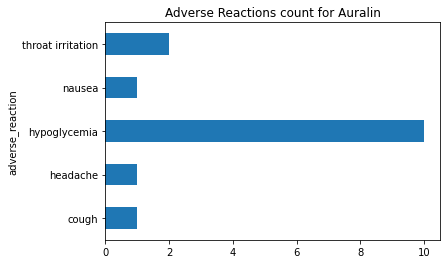

In [87]:
after_adverse_reactions.auralin.plot(kind = 'barh', title = 'Adverse Reactions count for Auralin')

<AxesSubplot:title={'center':'Adverse Reactions count for Novodra'}, ylabel='adverse_reaction'>

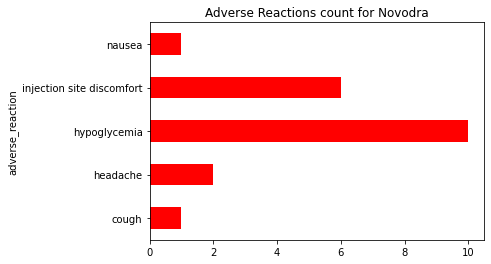

In [88]:
after_adverse_reactions.novodra.plot(kind = 'barh', title = 'Adverse Reactions count for Novodra', color = 'red')

In [95]:
treatments_clean['dose_change'] = treatments_clean.dose_start - treatments_clean.dose_start
treatments_clean.head()

,patient_id,hba1c_start,hba1c_end,hba1c_change,treatment,dose_start,dose_end,adverse_reaction,dose_change
0,1,7.71,7.30,0.41,novodra,33,33,NaN,0
1,2,9.53,9.10,0.43,novodra,27,29,NaN,-2
2,4,7.58,7.10,0.48,novodra,43,48,NaN,-5
3,6,7.73,7.34,0.39,auralin,50,60,NaN,-10
4,7,7.65,7.26,0.39,novodra,32,33,NaN,-1


In [96]:
after_mean = treatments_clean.groupby(['treatment']).mean()

In [97]:
after_mean

,patient_id,hba1c_start,hba1c_end,hba1c_change,dose_start,dose_end,dose_change
treatment,,,,,,,
auralin,248.137143,7.959143,7.571486,0.387657,39.022857,47.348571,-8.325714
novodra,264.195402,7.954885,7.550172,0.404713,39.155172,38.770115,0.385057


In [98]:
after_mean.dose_change

treatment
auralin   -8.325714
novodra    0.385057
Name: dose_change, dtype: float64

<AxesSubplot:title={'center':'Pre-trial/Post-trial Mean Insulin Unit Dose Change (Units)'}, xlabel='treatment'>

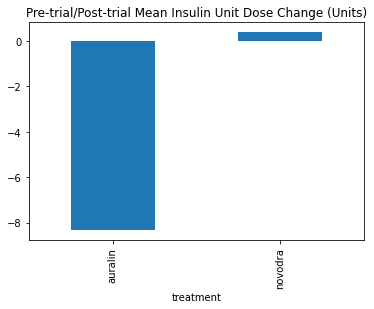

In [101]:
after_mean.dose_change.plot(kind = 'bar', title = 'Pre-trial/Post-trial Mean Insulin Unit Dose Change (Units)')